In [207]:
import pandas as pd
import matplotlib.pyplot as plt
from pyfonts import load_google_font
from highlight_text import ax_text, fig_text
from drawarrow import ax_arrow

df = pd.read_csv('share-of-people-who-think-homosexuality-is-never-justified.csv')

In [156]:

countries = {'United States': '#b13507', 
        'Spain': '#4c6a9c',
        'United Kingdom': '#996d39', 
        'Sweden': '#2c8465', 
        'Netherlands': '#6d3e91'}

years = [1984, 2022]

fonts = {'title' : load_google_font('Playfair Display'), 
         'labels_reg': load_google_font('Libre Franklin'),
         'labels_bold': load_google_font('Libre Franklin', weight = 'bold')} 

# Create a subset of countries and years from the viz
df = (df.loc[(df['Entity'].isin(countries)) & (df['Year'].isin(years)),
 ['Entity','Year','Homosexuality: Never justifiable (aggregate)']])

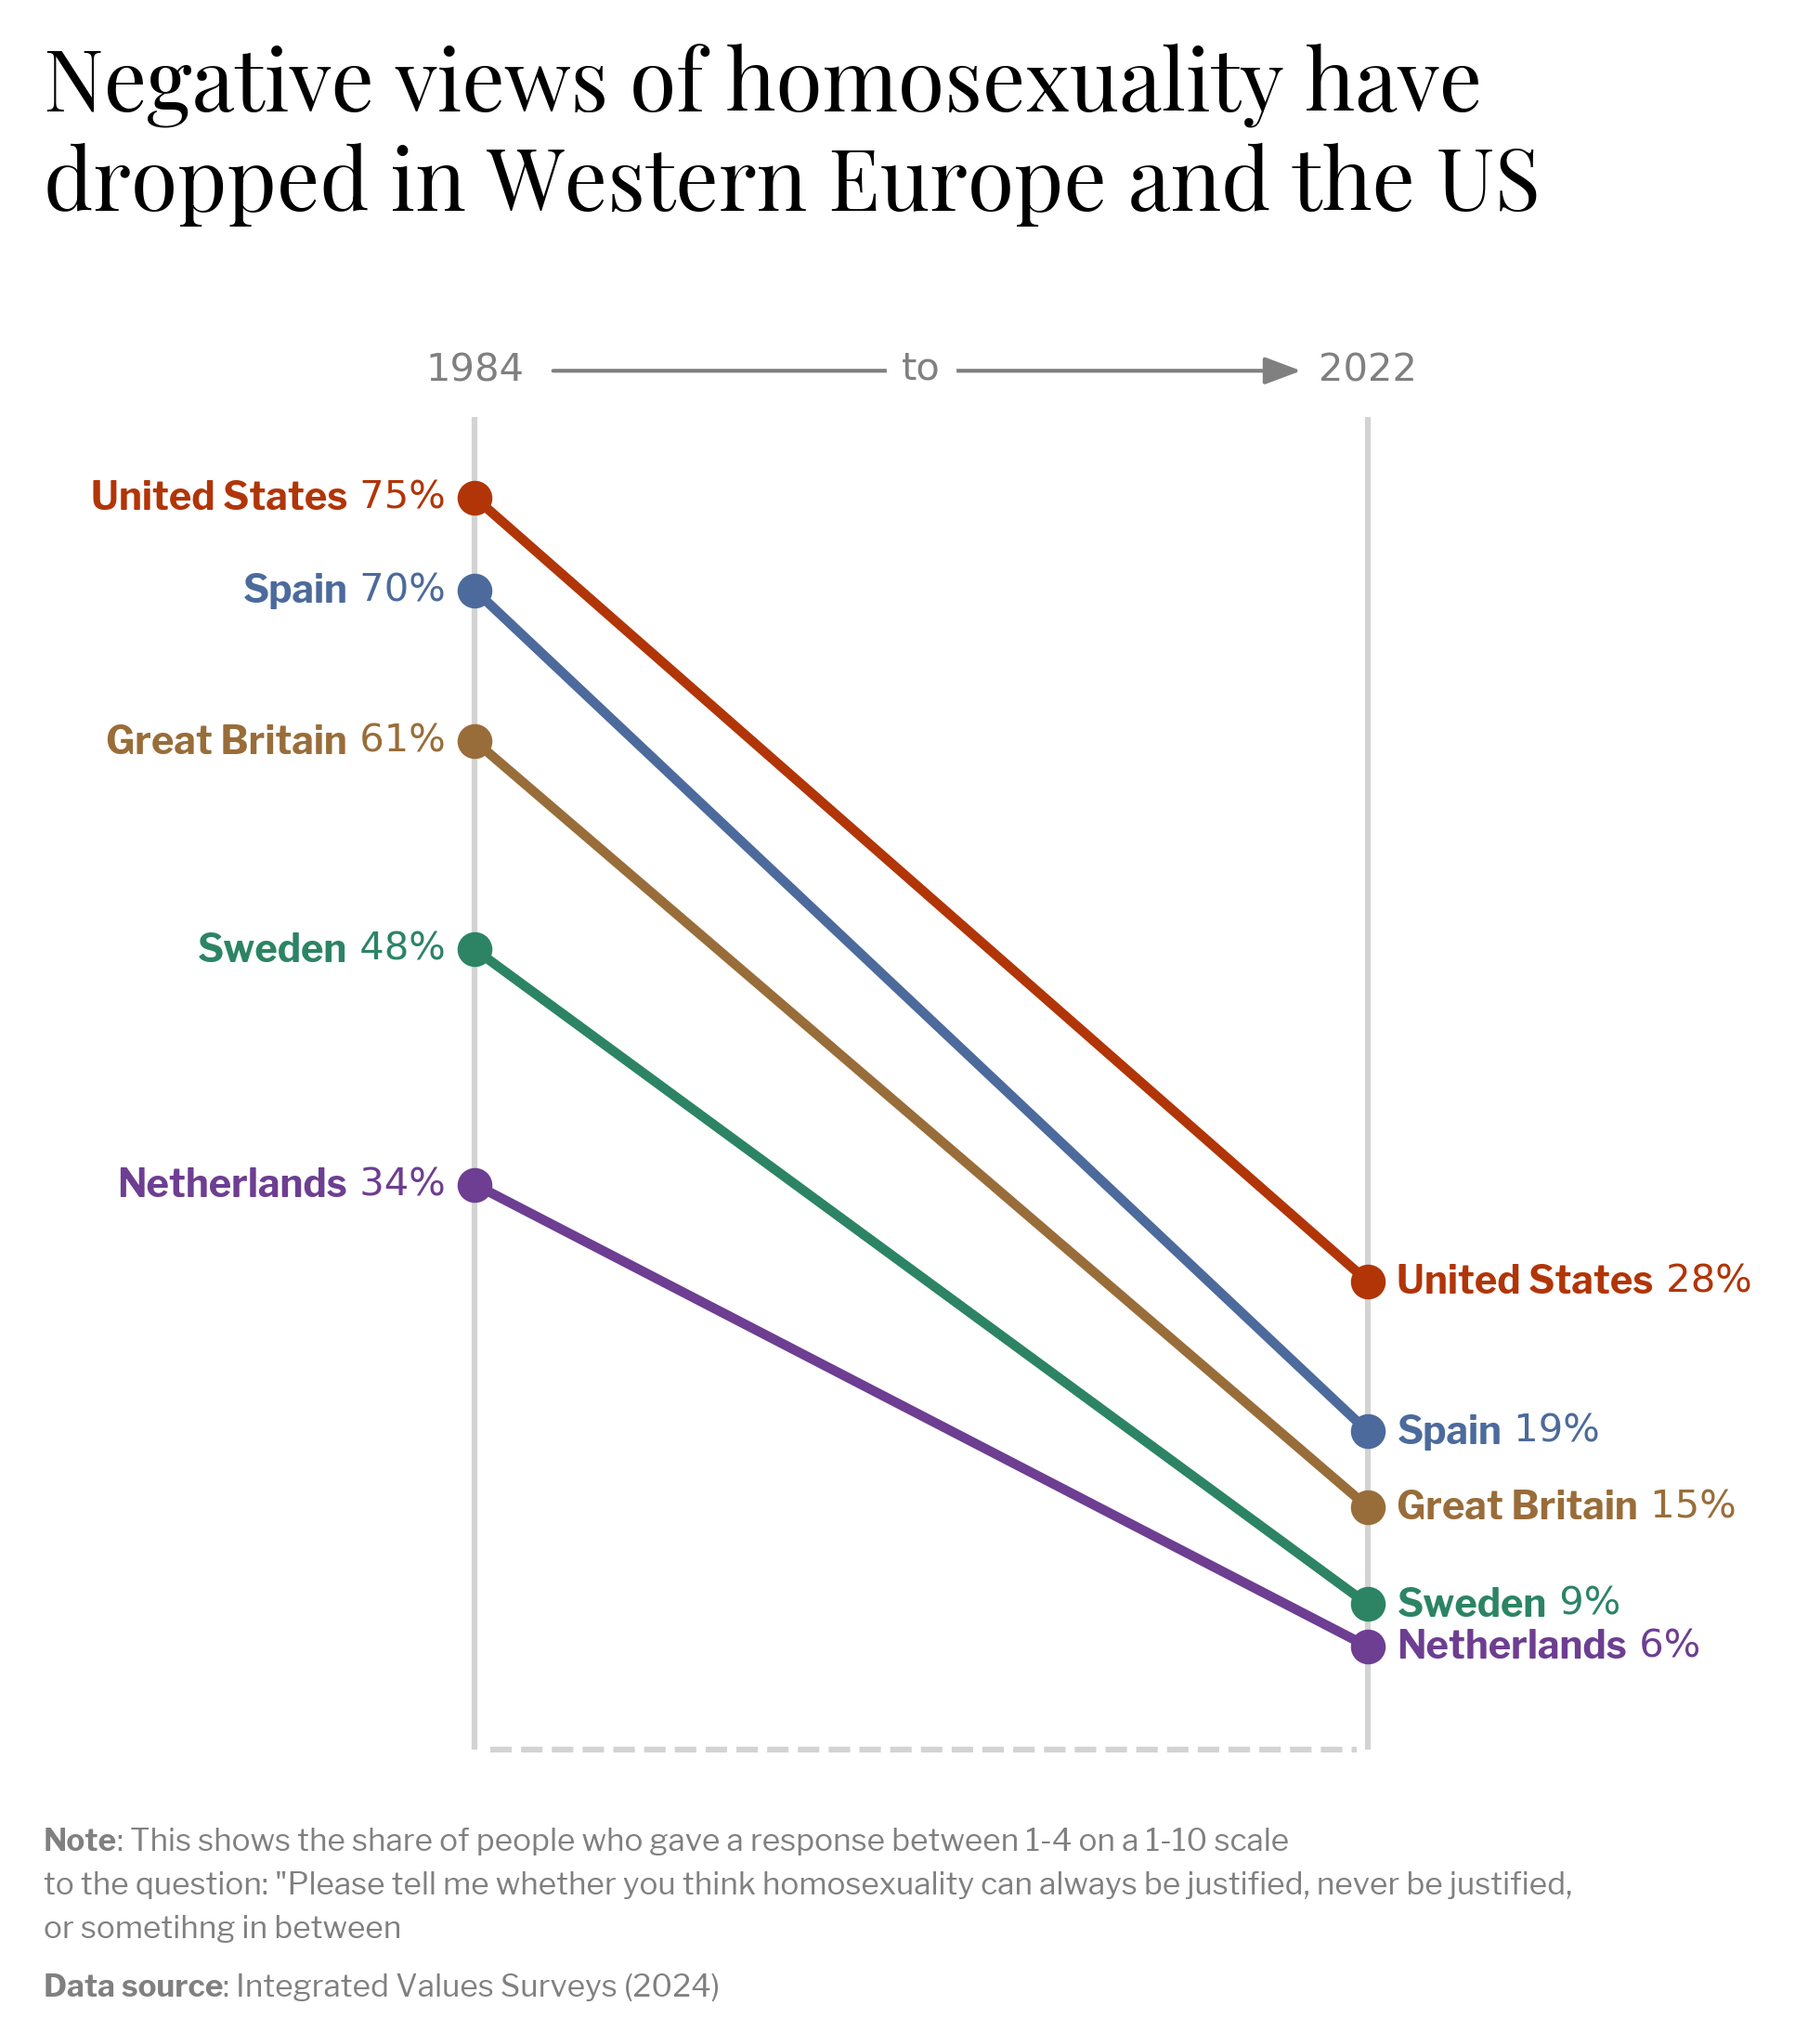

In [222]:
fig, ax = plt.subplots(figsize = (6.5,7), dpi = 300, layout = 'tight')

for country in countries:
    past = df.loc[(df['Entity'] == country) & (df['Year'] == 1984), 'Homosexuality: Never justifiable (aggregate)']
    present = df.loc[(df['Entity'] == country) & (df['Year'] == 2022), 'Homosexuality: Never justifiable (aggregate)']
    
    ax.plot(years, 
            [past, present],
           color = countries[country],
           linewidth = 2.5,
           marker = 'o', markersize = 8)
    
    ax_text(x = years[0] - 1.25, y = past,
            s = (f'<{country}> {round(float(past.iloc[0]))}%' if country != 'United Kingdom' 
                 else f'<Great Britain> {round(float(past.iloc[0]))}%'),
           highlight_textprops= [{'font' : fonts['labels_bold']}],
            ha = 'right', va = 'center',
            color = countries[country])

    ax_text(x = years[1] + 1.25, y = present,
            s = (f'<{country}> {round(float(present.iloc[0]))}%' if country != 'United Kingdom' 
                 else f'<Great Britain> {round(float(present.iloc[0]))}%'), 
            highlight_textprops= [{'font' : fonts['labels_bold']}],
            ha = 'left', va = 'center',
            color = countries[country])

for year in years:
    ax.vlines(x = year,
            ymin = 0, ymax = 80, color = 'lightgrey', zorder = 0)

ax.hlines(y= 0, 
         xmin = 1984.65, xmax = 2021.55, ls = '--', color = 'lightgrey')

ax_text(x= 2003, y= 84,
       s = '<to>', ha = 'center', 
        highlight_textprops = [{
                                'color': 'grey',
                                'bbox': {
                                'edgecolor' : 'white',
                                'facecolor' : 'white',
                                'pad': 3.5}
                                }])

ax_arrow(tail_position=(1987, 82.75),
        head_position=(2019.5, 82.75),
        color = 'grey', head_width= 3)

fig_text(x = 0.025, y = 1.01, s = 'Negative views of homosexuality have\ndropped in Western Europe and the US',
         font = fonts['title'], fontsize = 22)

fig_text(x = 0.025, y = 0.095, s = """<Note>: This shows the share of people who gave a response between 1-4 on a 1-10 scale
to the question: "Please tell me whether you think homosexuality can always be justified, never be justified,
or sometihng in between

<Data source>: Integrated Values Surveys (2024)""",
         font = fonts['labels_reg'], fontsize = 8, color = 'grey',
        highlight_textprops = [{'font': fonts['labels_bold']},
                              {'font': fonts['labels_bold']}])

ax.tick_params(axis = 'x', length = 0, labeltop=True, labelbottom = False, pad = -10, labelcolor = 'grey')
ax.spines[:].set_visible(False)
ax.set_yticks([])
ax.set_xticks(years)

plt.show()

In [ ]:
#change Netherlands label y value so more space from sweden label
# tick font size
# tick labels, arrow , 'to' and vlines all the same color
# hline '--' brighter
# title font
# footer font / fontsize